In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Modelling
from scipy.stats.contingency import association
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import randint

# read input
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")

In [2]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train_data.shape

(891, 12)

In [4]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Verify null values

In [5]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

the shape is (891, 12)

and we have 687 na values in Cabin column

77% of values are NA

maybe its a good idea to discard this column

In [6]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
train_data.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [9]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
train_data = train_data[[#'PassengerId', 
    'Survived', 'Pclass', #'Name', 
    'Sex', 'Age', 'SibSp',
       'Parch', #'Ticket', 
    'Fare', #'Cabin', 
    'Embarked']]

In [11]:
train_data['Embarked'].fillna('S', inplace=True)

/tmp/ipykernel_17/3342620763.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Embarked'].fillna('S', inplace=True)
/tmp/ipykernel_17/3342620763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Embarked'].fillna('S', inplace=True)


In [12]:
test_data.isna().sum()
test_data['Ticket'].fillna(0, inplace=True)
test_data.dropna(subset=['Cabin', 'Age'])

/tmp/ipykernel_17/3325129057.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Ticket'].fillna(0, inplace=True)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S
...,...,...,...,...,...,...,...,...,...,...,...
404,1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


<Axes: xlabel='Embarked'>

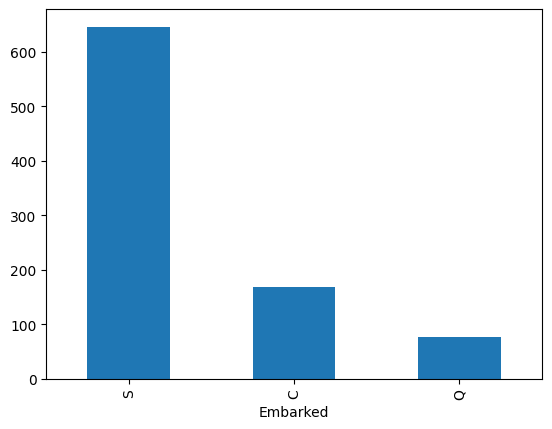

In [13]:
train_data=pd.get_dummies(train_data, columns = ['Sex'], drop_first=True)
test_data=pd.get_dummies(test_data, columns = ['Sex'], drop_first=True)
embarked = train_data['Embarked'].copy()
train_data=pd.get_dummies(train_data, columns = ['Embarked'], drop_first=False)
test_data=pd.get_dummies(test_data, columns = ['Embarked'], drop_first=False)
embarked.value_counts().plot(kind='bar')


In [14]:
print(train_data['Age'].mean())
print(train_data['Age'].std())
print(train_data['Age'].median())
print(train_data['Age'].mode())


29.69911764705882
14.526497332334042
28.0
0    24.0
Name: Age, dtype: float64


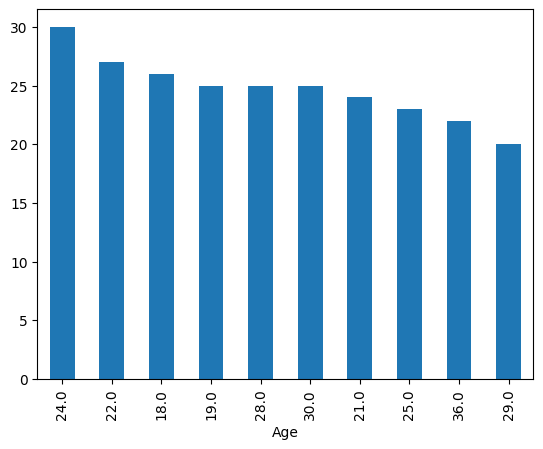

In [15]:
age = train_data['Age'].value_counts().head(10).plot(kind='bar')

In [16]:
#train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
#train_data

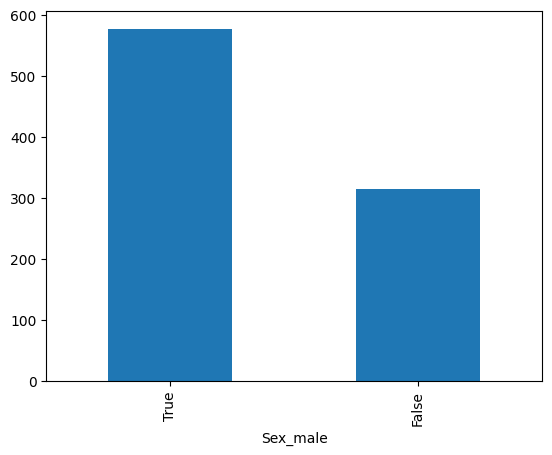

In [17]:
sex = train_data['Sex_male'].value_counts().plot(kind='bar')

Survived
0    549
1    342
Name: count, dtype: int64


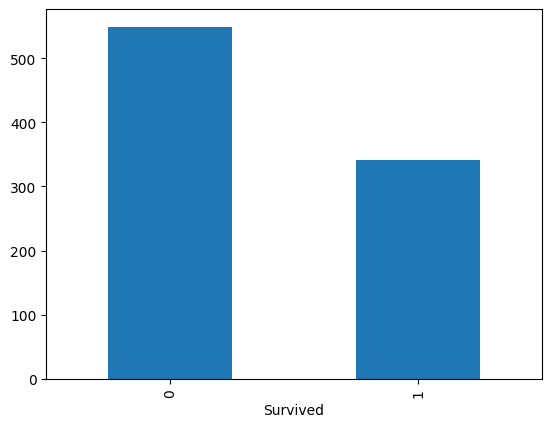

In [18]:
survival = train_data['Survived'].value_counts().plot(kind='bar')
print(train_data['Survived'].value_counts())

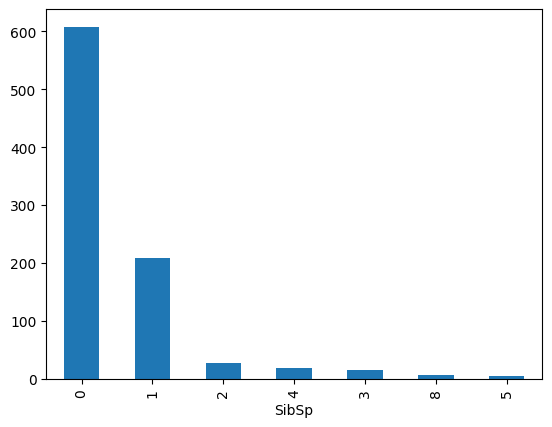

In [19]:
sibsp = train_data['SibSp'].value_counts().plot(kind='bar')

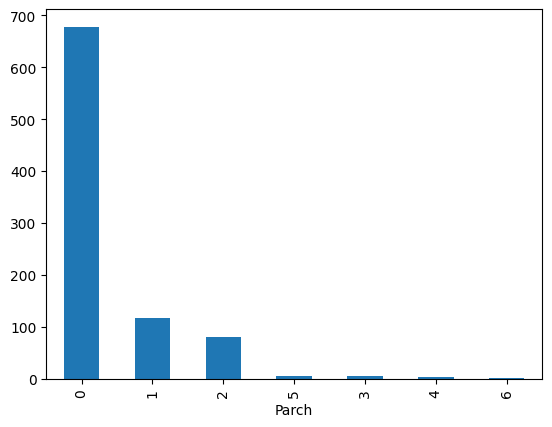

In [20]:
parch = train_data['Parch'].value_counts().plot(kind='bar')

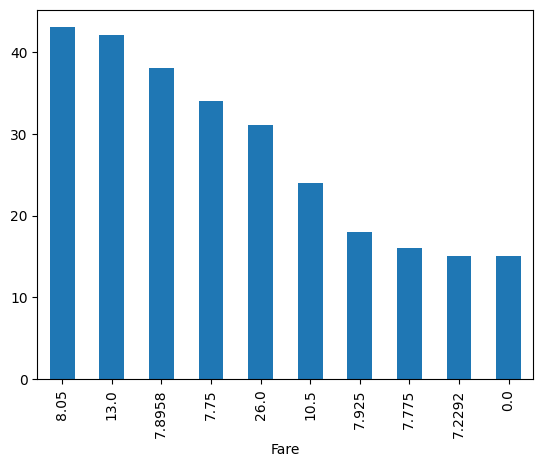

In [21]:
passenger_fare = train_data['Fare'].value_counts().head(10).plot(kind='bar')

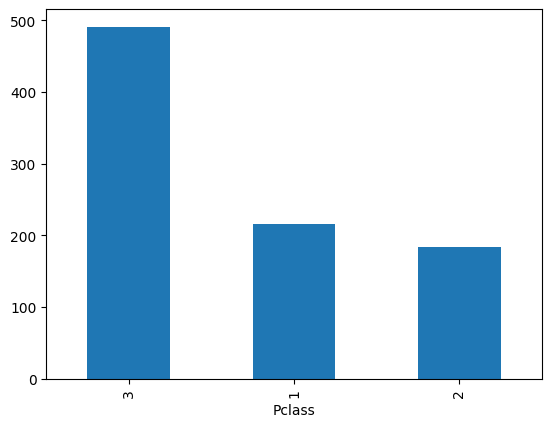

In [22]:
embarked = train_data['Pclass'].value_counts().head(10).plot(kind='bar') 

In [23]:
embarked

<Axes: xlabel='Pclass'>

In [24]:
df_corr = train_data[[#'PassengerId',
    #'Survived', 'Pclass', #'Name',
    #'Sex', 
    'Age', 'SibSp',
       'Parch', #'Ticket', 
    'Fare', #'Cabin', 
    #'Embarked_S',
    #'Embarked_Q',
    #'Embarked_C'
]].dropna().corr(method='pearson')
df_corr

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.383820,0.138329
Parch,-0.189119,0.383820,1.000000,0.205119
Fare,0.096067,0.138329,0.205119,1.000000


its not good to use categorical data in pearson's correlation

so ill try to find another way to correlate these data

In [25]:
print(train_data[['Survived', 'Embarked_S']])

     Survived  Embarked_S
0           0        True
1           1       False
2           1        True
3           1        True
4           0        True
..        ...         ...
886         0        True
887         1        True
888         0        True
889         1       False
890         0       False

[891 rows x 2 columns]


In [26]:
sur_pclass=association(train_data[['Survived', 'Pclass']], method='cramer')
sur_pclass

0.5157241041177254

In [27]:

train_data.dropna(inplace=True)
test_data.dropna(inplace=True)


In [28]:
#select and drop
y_train = train_data['Survived']
x_train = train_data.drop(columns=['Survived'])
x_test = test_data.drop(columns=['Name', 'PassengerId', 'Ticket', 'Cabin'])
x_train.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [29]:
# now we fit
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print(y_train)

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64


In [30]:
# predict
y_pred = rf.predict(x_test)
output_train_data = pd.DataFrame()
output_train_data['PassengerId'] = test_data['PassengerId']
output_train_data['Survived'] = y_pred
print(output_train_data)


output_train_data.to_csv("/kaggle/working/submission.csv", index=False)


     PassengerId  Survived
12           904         1
14           906         1
24           916         1
26           918         1
28           920         1
..           ...       ...
404         1296         0
405         1297         0
407         1299         0
411         1303         1
414         1306         1

[87 rows x 2 columns]
